[0]Logistic Regression Training Accuracy:  0.7949438202247191
[1]K Neighbors Training Accuracy:  0.8497191011235955
[2]SVC Linear Training Accuracy:  0.7865168539325843
[3]SVC RBF Training Accuracy:  0.6376404494382022
[4]Gaussian NB Training Accuracy:  0.773876404494382
[5]Decision Tree Training Accuracy:  0.9887640449438202
[6]Random Forest Training Accuracy:  0.9676966292134831


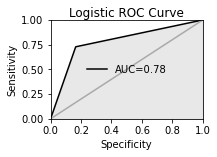

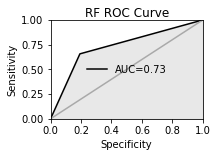

In [1]:
# import libraries
'''
pip install numpy
pip install seaborn
pip install sklearn
'''
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

# load the data
titanic_train = pd.read_csv('tmp/train_data.csv')
titanic_train = titanic_train.drop('Unnamed: 0',axis=1)

titanic_test = pd.read_csv('tmp/test_data.csv')
titanic_test = titanic_test.drop('Unnamed: 0',axis=1)

titanic = pd.concat([titanic_train,titanic_test])

X = titanic.iloc[:, [0,1,2,3,-1]].values
Y = titanic.iloc[:, -2].values

# split the dataset into 80% training and 20% testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# create a function with many machine learning models
def models(X_train, Y_train):
    
    # use logistic regresion
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state=0)
    log.fit(X_train, Y_train)
    
    # use KNeighbors
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2)
    knn.fit(X_train, Y_train)
    
    # use SVC (linear kernel)
    from sklearn.svm import SVC
    svc_lin = SVC(kernel='linear', random_state=0)
    svc_lin.fit(X_train, Y_train)
    
    # use SVC (RBF kernel)
    from sklearn.svm import SVC
    svc_rbf = SVC(kernel='rbf', random_state=0)
    svc_rbf.fit(X_train, Y_train)
    
    # use GaussianNB
    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(X_train, Y_train)
    
    # use decision tree
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
    tree.fit(X_train, Y_train)
    
    # use the RandomForestClassifier
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators=10, criterion='entropy',random_state=0)
    forest.fit(X_train,Y_train)
    
    # print the training accuracy for each model
    print('[0]Logistic Regression Training Accuracy: ', log.score(X_train, Y_train))
    print('[1]K Neighbors Training Accuracy: ', knn.score(X_train, Y_train))
    print('[2]SVC Linear Training Accuracy: ', svc_lin.score(X_train, Y_train))
    print('[3]SVC RBF Training Accuracy: ', svc_rbf.score(X_train, Y_train))
    print('[4]Gaussian NB Training Accuracy: ',  gauss.score(X_train, Y_train))
    print('[5]Decision Tree Training Accuracy: ', tree.score(X_train, Y_train))
    print('[6]Random Forest Training Accuracy: ', forest.score(X_train, Y_train))

    
    return log, knn, svc_lin, svc_rbf, gauss, tree, forest 

# get and train all of the models
model = models(X_train, Y_train)

# plot ROC and AOC
from sklearn.metrics import confusion_matrix,roc_curve,auc,precision_recall_curve,average_precision_score
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

#plot the auc/roc curve to evaluate the performance of Logistic Regression
def plot_LR_ROC(x_test,y_test):
    y_pro=model[0].predict(X_test)
    false_positive_rate,recall,thresholds=roc_curve(y_test,y_pro)
    roc_auc=auc(false_positive_rate,recall)
    ax3=plt.subplot(223)
    ax3.set_title("Logistic ROC Curve",verticalalignment='center')
    plt.plot(false_positive_rate,recall,'black',label='AUC=%0.2f'%roc_auc)
    plt.legend(loc=10,frameon=False)
    plt.plot([0,1],[0,1],'darkgrey')
    plt.fill_between(false_positive_rate,recall,color='lightgrey',alpha=0.5)
    plt.xlim([0.0,1.0]) # Set the range for x ticks
    plt.ylim([0.0,1.0]) # Set the range for y ticks
    plt.ylabel('Sensitivity')
    plt.xlabel('Specificity')
    plt.show()
    
#plot the auc/roc curve for evaluation of Random Forest
def plot_RF_ROC(x_test,y_test):
    y_pro=model[6].predict(X_test)
    false_positive_rate,recall,thresholds=roc_curve(y_test,y_pro)
    roc_auc=auc(false_positive_rate,recall)
    ax3=plt.subplot(223)
    ax3.set_title("RF ROC Curve",verticalalignment='center')
    plt.plot(false_positive_rate,recall,'black',label='AUC=%0.2f'%roc_auc)
    plt.legend(loc=10,frameon=False)
    plt.plot([0,1],[0,1],'darkgrey')
    plt.fill_between(false_positive_rate,recall,color='lightgrey',alpha=0.5)
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])
    plt.ylabel('Sensitivity')
    plt.xlabel('Specificity')
    plt.show()
    
plot_LR_ROC(X_test,Y_test)
plot_RF_ROC(X_test,Y_test)
